2


(matrix([[-3.24140214,  1.1272942 ]]),
 array([ 13.47438093,  11.86318714,  11.80230941,  11.79045717,
         11.78018989,  11.77000832,  11.75986496,  11.74975819,
         11.73968782,  11.72965373,  11.71965578,  11.70969384,
         11.69976778,  11.68987748,  11.6800228 ,  11.67020362,
         11.6604198 ,  11.65067123,  11.64095777,  11.6312793 ,
         11.62163569,  11.61202681,  11.60245254,  11.59291276,
         11.58340735,  11.57393617,  11.5644991 ,  11.55509603,
         11.54572682,  11.53639137,  11.52708954,  11.51782121,
         11.50858627,  11.49938459,  11.49021606,  11.48108055,
         11.47197794,  11.46290812,  11.45387098,  11.44486638,
         11.43589421,  11.42695437,  11.41804672,  11.40917116,
         11.40032757,  11.39151584,  11.38273584,  11.37398747,
         11.3652706 ,  11.35658514,  11.34793096,  11.33930795,
         11.33071601,  11.32215501,  11.31362484,  11.3051254 ,
         11.29665658,  11.28821826,  11.27981033,  11.27143269,
 

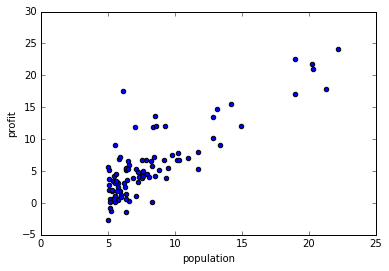

In [35]:
import os  
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

path = '%s/%s' % (os.getcwd(),'data/ex1data1.txt')
data = pd.read_csv(path, header=None, names=['population', 'profit'])
data.plot(kind='scatter', x='population', y='profit')  

def computeCost(X,y,theta):
    """compute the cost (mean-squared error)
    """
    inner = np.power(((X * theta.transpose()) - y), 2)
    return np.sum(inner) / len(X)

def gradientDescent(X,y,theta,alpha,iters):
    # tmp matrix gets updated and then set to be theta
    # at each step of gradient descent
    tmp = np.matrix(np.zeros(theta.shape))
    
    # number of parameters in theta
    nparams = int(theta.ravel().shape[1])
    
    # keep track of the cost over iterations
    cost = np.zeros(iters)
    
    for i in range(iters):
        
        # compute the error for all X's as X * theta transpose - y
        error = (X * theta.transpose()) - y
        
        # update the theta values for each column in X
        # storing the updated values in the tmp matrix
        for j in range(nparams):
            # multiply the column by the error and use it
            # to update the tmp matrix
            col = X[:,j]
            term = np.multiply(error, col)
            tmp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        
        # theta is now tmp
        theta = tmp
        cost[i] = computeCost(X,y,theta)
    
    return theta, cost

data.insert(0, 'ones', 1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

gradientDescent(X,y,theta,0.01,1000)